### Scaling graph plot 

- Authors : Angelica , Kshitij

In [18]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [19]:
def plot_scaling_analysis(results_dir, out='plot_scaling_analysis.png'):
    data = [json.load(open(f)) for f in Path(results_dir).glob("*.json")]
    df = pd.DataFrame(data)
    df['total_time_min'] = df['total_time_sec'] / 60

    executor_memory = df['executor_memory'].iloc[0]
    executor_cores = df['executor_cores'].iloc[0]

    speedup_list = []
    for fraction in df['sample_fraction'].unique():
        subset = df[df['sample_fraction'] == fraction]
        min_executors = subset['num_executors'].min()
        t_min = subset[subset['num_executors'] == min_executors]['total_time_min'].iloc[0]
        speedup_list.extend([{
            'sample_fraction': fraction,
            'num_executors': row['num_executors'],
            'speedup': t_min / row['total_time_min']
        } for _, row in subset.iterrows()])

    df_speedup = pd.DataFrame(speedup_list)

    fig, ax = plt.subplots(figsize=(10, 6))
    for fraction in sorted(df_speedup['sample_fraction'].unique()):
        subset = df_speedup[df_speedup['sample_fraction'] == fraction].sort_values('num_executors')
        ax.plot(subset['num_executors'], subset['speedup'], 
                marker='o', linewidth=2, markersize=8, label=f'{fraction*100:.0f}% data')
        
        for _, row in subset.iterrows():
            ax.annotate(f'{int(row["num_executors"])}', 
                       xy=(row['num_executors'], row['speedup']),
                       xytext=(5, 5), textcoords='offset points',
                       fontsize=8, alpha=0.7)

    ax.set_xlabel('Number of Executors', fontsize=12)
    ax.set_ylabel('Speed-up T(min)/T(n)', fontsize=12)
    ax.set_title(f'Speed-up Curve for Cluster Scaling\n({executor_memory}GB Memory, {executor_cores} Cores per Executor)', 
                 fontsize=14, weight='bold')
    ax.legend(title='Data Fraction', fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(out, dpi=300)
    plt.show()
    return df_speedup


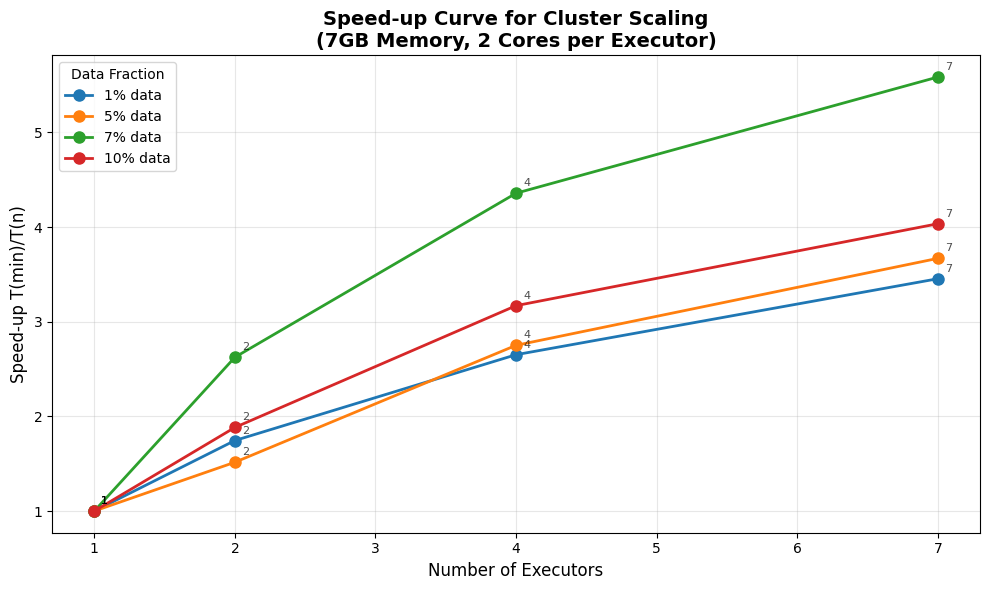

,sample_fraction,num_executors,speedup
0,0.01,1,1.000000
1,0.01,4,2.651307
2,0.01,7,3.453696
3,0.01,2,1.744832
4,0.10,2,1.883107
5,0.10,4,3.169326
6,0.10,1,1.000000
7,0.10,7,4.034414
8,0.05,7,3.668758
9,0.05,2,1.515291


In [20]:
results_dir_local = Path("../results/local/experiment-1-fixed-tree/")
plot_scaling_analysis(results_dir_local, out='graphs/scaling_analysis_local.png')

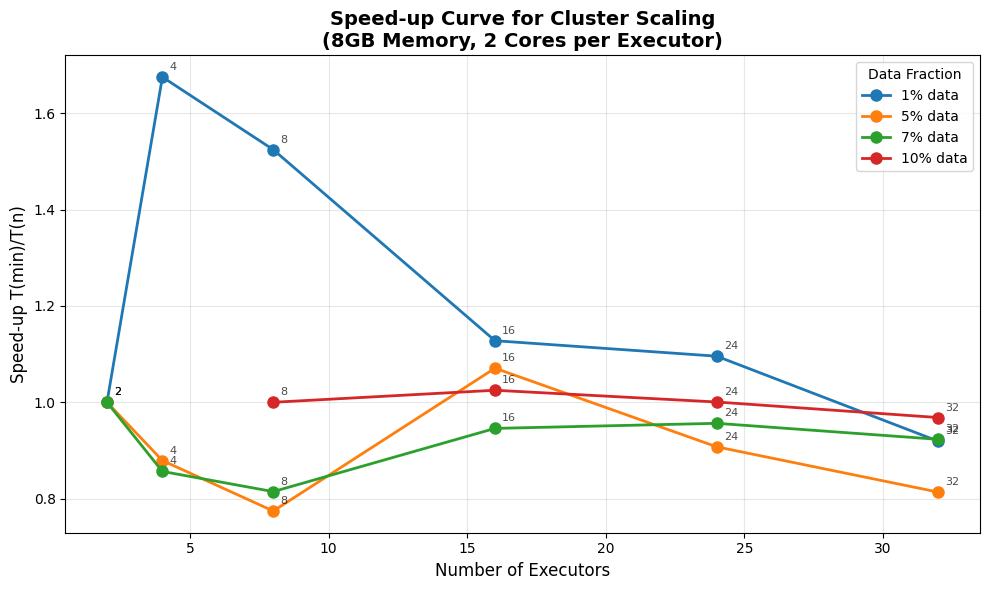

,sample_fraction,num_executors,speedup
0,0.10,24.0,1.000591
1,0.10,16.0,1.024992
2,0.10,32.0,0.968264
3,0.10,8.0,1.000000
4,0.05,8.0,0.774291
5,0.05,2.0,1.000000
6,0.05,32.0,0.813439
7,0.05,4.0,0.879048
8,0.05,24.0,0.907566
9,0.05,16.0,1.070783


In [21]:
results_dir_local = Path("../results/server/")
plot_scaling_analysis(results_dir_local, out='graphs/scaling_analysis_server.png')

In [22]:
data = [json.load(open(f)) for f in Path("../results/server/").glob("*.json")]
df = pd.DataFrame(data)
print("Available data:")
print(df[['sample_fraction', 'num_executors', 'total_time_sec']].sort_values(['sample_fraction', 'num_executors']))
print("\nFor 5% data:")
subset = df[df['sample_fraction'] == 0.05]
print(subset[['num_executors', 'total_time_sec']].sort_values('num_executors'))
print(f"\nMin executors: {subset['num_executors'].min()}")
print(f"Time at min executors (2): {subset[subset['num_executors'] == 2]['total_time_sec'].iloc[0]}")

Available data:
    sample_fraction  num_executors  total_time_sec
21             0.01              2          311.66
3              0.01              4          186.05
13             0.01              8          204.45
10             0.01             16          276.34
6              0.01             24          284.44
5              0.01             32          339.12
7              0.05              2          382.43
16             0.05              4          435.05
1              0.05              8          493.91
19             0.05             16          357.15
18             0.05             24          421.38
15             0.05             32          470.14
14             0.07              2          503.03
9              0.07              4          587.32
17             0.07              8          617.54
4              0.07             16          531.85
2              0.07             24          525.99
11             0.07             32          544.95
20             